# An example on how to do an FFT in Python

In [46]:
import numpy as np
import seaborn as sns
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

49.9


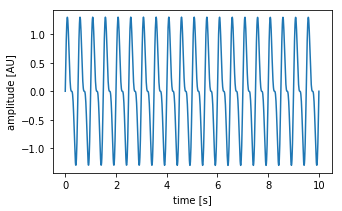

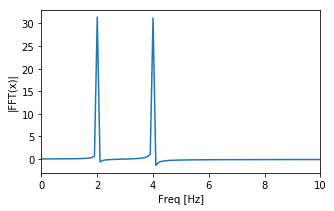

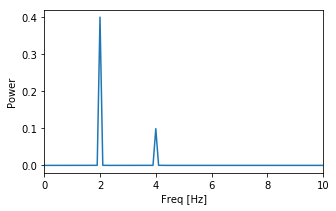

In [51]:
#An example of FFT 
Fs = 100 #sample rate
pi = np.pi

f0 = 2 #cycles per sec
f1 = 4
t = np.linspace(0,10,1000) 
x = np.sin(2*pi*f0*t) + 0.5*np.sin(2*pi*f1*t)
plt.figure(figsize=(5,3))
plt.plot(t,x)
plt.xlabel('time [s]')
plt.ylabel('amplitude [AU]')

Xf = np.fft.fft(x)
n = x.size
timestep = 1/Fs
freq = np.fft.fftfreq(n,d=timestep)
print(max(freq))
plt.figure(figsize=(5,3))
plt.plot(freq[:int(n/2)],Xf.real[:int(n/2)])
plt.xlim([0,10])
plt.xlabel('Freq [Hz]')
plt.ylabel('|FFT(x)|')

powXf = np.abs(Xf)**2 #power spectrum
powXf = powXf/np.sum(powXf) #relative power to total
plt.figure(figsize=(5,3))
plt.plot(freq[:int(n/2)],powXf[:int(n/2)])
plt.xlim([0,10])
plt.xlabel('Freq [Hz]')
plt.ylabel('Power')

## Using the Welch method

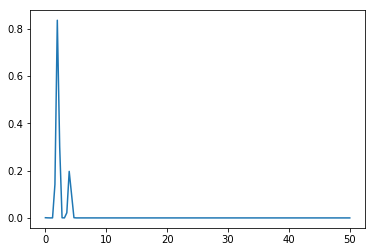

In [55]:
f,Pxx_den = scipy.signal.welch(x,fs=Fs)
# plt.semilogy(f,Pxx_den)
plt.plot(f,Pxx_den)

In [ ]:
#EXAMPLE of creating dict of dicts
# trial = 0
# s  = 'accel'
# clip_data={}
# clip_data[trial] = {}
# clip_data[trial][s] = clips
# s2 = 'gyro'
# clip_data[trial][s2] = clips
# # clip_data[trial]['size'] = clip_len